# Plug flow reactor simulation of Thruster

![caption](Graphics/thruster-details.png)


In [1]:
import cantera as ct
import numpy as np

from matplotlib import pyplot as plt
import csv
import os
import itertools
import pandas as pd

In [2]:
# default if not using SLURM array
cat_area_per_vol = 6e4 # m2/m3
temperature_c = 400 # ºC

# input file containing the reaction mechanism
cti_file = '../RMG-model/cantera/chem_annotated.cti'
#cti_file = '../RMG-model/cantera/chem0050.cti'

In [3]:
cat_area_per_vol_options = [3e2, 3e3, 3e4, 3e5, 6e5, 9e5, 1.2e6, 3e6, 3e7, 3e8] # m2/m3
temperature_c_options = [200, 300, 400, 500, 600] # ºC
settings  = list(itertools.product(cat_area_per_vol_options, temperature_c_options))
print(f"Settings aray is from 0 to {len(settings)-1} ")

Settings aray is from 0 to 49 


In [4]:
task_number = int(os.getenv('SLURM_ARRAY_TASK_ID', default='0'))
task_min = int(os.getenv('SLURM_ARRAY_TASK_MIN', default='0'))
task_max = int(os.getenv('SLURM_ARRAY_TASK_MAX', default='0'))

if task_max > 0:
    print("Using SLURM array job.")
    
    cti_file = 'chem_annotated.cti'
    print(f"Using cantera input file {os.path.abspath(cti_file)}")

    print(f"Task ID {task_number} in array from {task_min} to {task_max}")

    cat_area_per_vol, temperature_c = settings[task_number]


In [5]:
if task_number == 0:
    import json
    setting_file_directory = '..' if task_max else 'rocketman'
    with open(os.path.join(setting_file_directory,'settings.json'),'w') as fp:
        json.dump(settings, fp)

In [6]:
print(f"Catalyst area per volume {cat_area_per_vol :.2e} m2/m3")
print(f"Initial temperature {temperature_c :.1f} ºC")

Catalyst area per volume 6.00e+04 m2/m3
Initial temperature 400.0 ºC


In [7]:
gas=ct.Solution(cti_file)
surf = ct.Interface(cti_file,'surface1', [gas])

In [8]:
gas()


  gas:

       temperature             300  K
          pressure          101325  Pa
           density         0.81974  kg/m^3
  mean mol. weight         20.1797  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy          1905.6        3.845e+04     J
   internal energy      -1.217e+05       -2.456e+06     J
           entropy          7257.7        1.465e+05     J/K
    Gibbs function     -2.1754e+06        -4.39e+07     J
 heat capacity c_p          1030.1        2.079e+04     J/K
 heat capacity c_v          618.03        1.247e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                Ne              1                1         -17.5994
     [ +178 minor]              0                0



In [9]:
print(", ".join(gas.species_names))

Ne, NH3(2), NH2OH(3), HNO3(4), CH3OH(5), H2O(6), N2(7), O2(8), NO2(9), NO(10), N2O(11), CO2(12), H2(13), CO(14), CH4(15), C2H6(16), CH2O(17), CH3(18), C3H8(19), H(20), C2H5(21), HCO(22), CH3CHO(23), OH(24), C2H4(25), O(36), Ar(37), He(38), HO2(39), H2O2(40), HOCO(41), CH2(42), CH2(S)(43), CH(44), CH2OH(45), CH3O(46), HCOH(47), CH3OO(48), CH2CO(49), C2H3(50), C(51), C2H2(52), C2H(53), CH3OOH(54), CH2OOH(55), HOCH2O(56), HOCHO(57), C2H5O(58), C2H5O2(59), C2H5O2(60), cC2H4O(61), CH2CHO(62), H2CC(63), CH3CO(64), C2H4O(65), C2H5O(66), C2H3O2(67), CHCHO(68), OCHCHO(69), HCCO(70), HCCOH(71), CHCHOH(72), C2(73), C2O(74), C2H6O(75), C2H5O(76), C2H5O3(77), cC2H3O(78), C2H3O3(79), OCHCO(80), C2H6O2(81), C2H5O2(82), C2H4O2(83), OCHO(84), NH2(85), NH(86), HNO(87), H2NO(88), HON(89), N(90), NNH(91), HONO(92), HNOH(93), HNO2(94), NO3(95), N2H2(96), H2N2(97), N2H3(98), N2H4(99), HCN(100), CN(101), HNC(102), NCO(103), HOCN(104), HNCO(105), NCCN(106), HNCN(107), NCN(108), HNCNH(109), HCNO(110), CH3CN(11

In [10]:
print(", ".join(surf.species_names))

X(1), HX(26), OX(27), CH3X(28), HOX(29), H2OX(30), CO2X(31), OCX(32), CX(33), CH2X(34), CHX(35), H2NX(201), H3NX(202), H2NOX(203), H2NOX(204), H3NOX(205), NO2X(206), NO3X(207), HNO3X(208), CH3OX(209), CH3OX(210), CH4OX(211), NO2X(214), NOX(215), NOJX(216), H2X(218), CH4X(220), C2H5X(221), CH2OX(224), CHO2X(502), SX(551), HNX(559), HNOX(560), SX(583), CH2OX(584), SX(586), HNOX(613), H2NOX(614), H2NOX(615), SX(670), SX(671), HNO2X(675), NX(705), SX(706), CH4NX(775), CH3NX(776), CH2NX(777), HONOX(783), HNOX(910), SX(1015), SX(1169), SX(1173), SX(1175), SX(1176), SX(1194), CNOX(1224), N2OX(1228), SX(1235), SX(1240), SX(1395), SX(1397), SX(1456), SX(1589), SX(1669), SX(1805), SX(1962), SX(1998), SX(2003), SX(2361), SX(2681), SX(3116), SX(3272), SX(3997), SX(5016), SX(5440), SX(5445), SX(6565), SX(6745), SX(6751), SX(7205)




This example solves a plug flow reactor problem, with coupled surface and gas chemistry.





In [11]:
# unit conversion factors to SI
cm = 0.01 # m
minute = 60.0  # s

In [12]:
#######################################################################
# Input Parameters for combustor
#######################################################################
mass_flow_rate =  0.5e-3 # kg/s
#temperature_c = 550.0  # Initial Temperature in Celsius
print(f"Initial temperature {temperature_c :.1f} ºC")
pressure = ct.one_atm # constant

length = 1.1 * cm  # Catalyst bed length. 11mm
cross_section_area = np.pi * (0.9*cm)**2  # Catalyst bed area.  18mm diameter circle.

### Catalyst properties. Some are hard to estimate
# if we can, update this lit value or verify the value richard calculated
porosity = 0.38  # Catalyst bed porosity (0.38)
# Al2O3 particles are about 0.7mm diameter
cat_specific_area = 140 # m2/g
print(f"Catalyst specific area {cat_specific_area :.2e} m2/g")
cat_density = 2 / cm**3 # 2 g/m3
print(f"Catalyst density {cat_density :.2e} g/m3")
cat_area_per_reactor_vol = cat_specific_area * cat_density # m2/m3
print(f"Catalyst area per total reactor volume {cat_area_per_reactor_vol :.2e} m/m3")
cat_area_per_gas_vol = cat_area_per_reactor_vol / porosity # porosity is gas vol per reactor vol
print(f"Catalyst area per gas volume {cat_area_per_gas_vol :.2e} m/m3")

#cat_area_per_vol =  cat_area_per_gas_vol * 1e-3 # REDUCE BY A LOT
print(f"\nCatalyst area per volume in use for this simulation: {cat_area_per_vol :.2e} m2/m3")



Initial temperature 400.0 ºC
Catalyst specific area 1.40e+02 m2/g
Catalyst density 2.00e+06 g/m3
Catalyst area per total reactor volume 2.80e+08 m/m3
Catalyst area per gas volume 7.37e+08 m/m3

Catalyst area per volume in use for this simulation: 6.00e+04 m2/m3


In [13]:
output_filename = 'surf_pfr_output.csv'

# The PFR will be simulated by a chain of 'NReactors' stirred reactors.
NReactors = 2201

#####################################################################

temperature_kelvin = temperature_c + 273.15  # convert to Kelvin

# import the gas model and set the initial conditions
gas = ct.Solution(cti_file, 'gas')

# From HAN-molefractions.ipynb
feed_mole_fractions = {
    'NH3(2)': 0.031,
    'NH2OH(3)': 0.32,
    'HNO3(4)': 0.35,
    'CH3OH(5)': 0.21,
    'H2O(6)': 0.09,
}
gas.TPX = temperature_kelvin, pressure, feed_mole_fractions


# import the surface model
surf = ct.Interface(cti_file,'surface1', [gas])
surf.TP = temperature_kelvin, pressure
surf.coverages = 'X(1):1.0'

r_len = length/(NReactors-1) 
r_vol = cross_section_area * r_len * porosity # gas volume

outfile = open(output_filename,'w')
writer = csv.writer(outfile)
writer.writerow(['Distance (mm)', 'T (C)', 'P (atm)'] +
                gas.species_names + surf.species_names + ['gas_heat','surface_heat','alpha'])

# catalyst area in one reactor
cat_area = cat_area_per_vol * r_vol

# Not sure we need the velocity
velocity = mass_flow_rate / (gas.density * cross_section_area)

In [14]:
def report_rates(n=8):
    print("\nHighest net rates of progress, gas")
    for i in np.argsort(abs(gas.net_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.net_rates_of_progress[i]:8.1g}")
    print("\nHighest net rates of progress, surface")
    for i in np.argsort(abs(surf.net_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.net_rates_of_progress[i]:8.1g}")
    print("\nHighest forward rates of progress, gas")
    for i in np.argsort(abs(gas.forward_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.forward_rates_of_progress[i]:8.1g}")
    print("\nHighest forward rates of progress, surface")
    for i in np.argsort(abs(surf.forward_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.forward_rates_of_progress[i]:8.1g}")
    print("\nHighest reverse rates of progress, gas")
    for i in np.argsort(abs(gas.reverse_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.reverse_rates_of_progress[i]:8.1g}")
    print("\nHighest reverse rates of progress, surface")
    for i in np.argsort(abs(surf.reverse_rates_of_progress))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {cat_area_per_vol*surf.reverse_rates_of_progress[i]:8.1g}")

    print(f"\nSurface rates have been scaled by surface/volume ratio {cat_area_per_vol:.1e} m2/m3")
    print("So are on a similar basis of volume of gas")
    print(" kmol / m3 / s")
report_rates()


Highest net rates of progress, gas
 47 : NO2(9) + OH(24) (+M) <=> HNO3(4) (+M)               -0.003
316 : NH2OH(3) (+M) <=> NH2(85) + OH(24) (+M)              8e-09
 88 : H2NO(88) + H2NO3(239) <=> HNO3(4) + NH2OH(3)        -8e-11
 70 : H(20) + H2NO(88) <=> NH2OH(3)                       -4e-12
 87 : H2NO3(239) + HNOH(93) <=> HNO3(4) + NH2OH(3)        -2e-14
 61 : H(20) + HNOH(93) <=> NH2OH(3)                       -2e-15
 42 : CH3(18) + OH(24) <=> CH3OH(5)                       -5e-17

Highest net rates of progress, surface
  0 : H2O(6) + X(1) <=> H2OX(30)                           2e+04
  1 : NH2OH(3) + X(1) <=> H3NOX(205)                       6e+03
  2 : HNO3(4) + X(1) <=> HNO3X(208)                        5e+03
  3 : CH3OH(5) + X(1) <=> CH4OX(211)                       4e+03
  4 : NH3(2) + X(1) <=> H3NX(202)                          8e+02
 13 : NH2OH(3) + 2 X(1) <=> H2NOX(204) + HX(26)              0.6
 15 : CH3OH(5) + 2 X(1) <=> CH3OX(210) + HX(26)              0.6

Highest forwa

In [15]:
def report_rate_constants(n=8):
    print("\nHighest forward rate constants, gas")
    for i in np.argsort(abs(gas.forward_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.forward_rate_constants[i]:8.1e}")
    print("\nHighest forward rate constants, surface")
    for i in np.argsort(abs(surf.forward_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {surf.forward_rate_constants[i]:8.1e}")
    print("\nHighest reverse rate constants, gas")
    for i in np.argsort(abs(gas.reverse_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {gas.reaction_equation(i):48s}  {gas.reverse_rate_constants[i]:8.1e}")
    print("\nHighest reverse rate constants, surface")
    for i in np.argsort(abs(surf.reverse_rate_constants))[-1:-n:-1]: # top n in descending order
        print(f"{i:3d} : {surf.reaction_equation(i):48s}  {surf.reverse_rate_constants[i]:8.1e}")

    print("Units are a combination of kmol, m^3 and s, that depend on the rate expression for the reaction.")
report_rate_constants()


Highest forward rate constants, gas
303 : CH2OH(45) + NO(10) <=> S(1221)                     2.5e+17
238 : CH2OH(45) + H2NO(88) <=> S(898)                    2.5e+17
342 : CH2OH(45) + HNOH(93) <=> ONCO(608)                 2.5e+17
239 : CH2OH(45) + NO2(9) <=> S(1543)                     2.5e+17
339 : HCO(22) + NO(10) <=> CHNO2(393)                    2.5e+17
560 : HCO(22) + HNO(509) <=> S(647)                      2.5e+17
445 : HCO(22) + HNOH(93) <=> ONCDO(262)                  2.5e+17

Highest forward rate constants, surface
 18 : CHX(35) + HX(26) <=> CH2X(34) + X(1)               3.1e+21
 20 : CHX(35) + X(1) <=> CX(33) + HX(26)                 3.1e+21
124 : CH2X(34) + HX(26) <=> CH3X(28) + X(1)              3.1e+21
190 : CH4NX(775) + X(1) <=> CH3NX(776) + HX(26)          7.4e+20
156 : CH3NX(776) + X(1) <=> CH2NX(777) + HX(26)          3.7e+20
242 : C2H5X(221) + X(1) <=> HX(26) + SX(2361)            1.2e+20
227 : SX(1962) + X(1) <=> H2NOX(204) + OCX(32)           2.9e+19

Highest rev

In [16]:
gas.TPX = temperature_kelvin, pressure, feed_mole_fractions
surf.coverages = 'X(1):1.0'
#surf.coverages = starting_coverages

In [17]:
# The plug flow reactor is represented by a linear chain of zero-dimensional
# reactors. The gas at the inlet to the first one has the specified inlet
# composition, and for all others the inlet composition is fixed at the
# composition of the reactor immediately upstream. Since in a PFR model there
# is no diffusion, the upstream reactors are not affected by any downstream
# reactors, and therefore the problem may be solved by simply marching from
# the first to last reactor, integrating each one to steady state.

TDY = gas.TDY
cov = surf.coverages

# create a new reactor
gas.TDY = TDY
r = ct.IdealGasReactor(gas, energy='on')
r.volume = r_vol

# create a reservoir to represent the reactor immediately upstream. Note
# that the gas object is set already to the state of the upstream reactor
upstream = ct.Reservoir(gas, name='upstream')

# create a reservoir for the reactor to exhaust into. The composition of
# this reservoir is irrelevant.
downstream = ct.Reservoir(gas, name='downstream')

# Add the reacting surface to the reactor. The area is set to the desired
# catalyst area in the reactor.
rsurf = ct.ReactorSurface(surf, r, A=cat_area)

# The mass flow rate into the reactor will be fixed by using a
# MassFlowController object.
m = ct.MassFlowController(upstream, r, mdot=mass_flow_rate)

# We need an outlet to the downstream reservoir. This will determine the
# pressure in the reactor. The value of K will only affect the transient
# pressure difference.
v = ct.PressureController(r, downstream, master=m, K=1e-5)

sim = ct.ReactorNet([r])
sim.max_err_test_fails = 24

# set relative and absolute tolerances on the simulation
sim.rtol = 1.0e-12
sim.atol = 1.0e-20

sim.verbose = False

# surf.set_multiplier(0.)  # turn off surface reactions
# surf.set_multiplier(1e6)  # make surface reactions a million times faster

r.volume = r_vol
rsurf.area = cat_area

print('    distance(mm)     T (C)    NH3(2)   NH2OH(3)     HNO3(4)    CH3OH(5)  alpha')
for n in range(NReactors):
    """
    if n == 0: # first coulpe of reactors are tiny
        surf.set_multiplier(0.)
        r.volume = r_vol * 1e-2
        rsurf.area = cat_area * 1e-2
    if n == 3:
        r.volume = r_vol
        rsurf.area = cat_area"""
        
    if n == 0: # start off with inert packing, no surface reactions
        surf.set_multiplier(0.)
    if n == int(0.001 * NReactors / length): # after 1 mm, catalyst
        surf.set_multiplier(1)
    
    # Set the state of the reservoir to match that of the previous reactor
    gas.TDY = TDY = r.thermo.TDY
    cov = surf.coverages
    upstream.syncState()
    sim.reinitialize()
    try:
#       the default is residual_threshold = sim.rtol*10
        sim.advance_to_steady_state(residual_threshold = sim.rtol*1000)

    except ct.CanteraError:
        t = sim.time
        sim.set_initial_time(0)
        gas.TDY = TDY
        surf.coverages = cov
        r.syncState()
        sim.reinitialize()
        new_target_time = 0.01 * t
        print(f"Couldn't reach {t:.1g} s so going to try {new_target_time:.1g} s")
        sim.advance(new_target_time)
        report_rates()
        #report_rate_constants()
 
    dist = n * r_len * 1.0e3   # distance in mm
        
    gas_heat = np.dot(gas.net_rates_of_progress, gas.delta_enthalpy) # heat evolved by gas phase reaction
    surface_heat = cat_area_per_vol * np.dot(surf.net_rates_of_progress, surf.delta_enthalpy) # heat evolved by surf phase reaction 
    alpha = surface_heat / (surface_heat + gas_heat) # fraction of heat release that is on surface.

    if not n % 10:
        print('    {:10f}  {:7.1f}  {:10f}  {:10f}  {:10f} {:10f}  {:5.1e}'.format(dist, r.T-273.15, *gas['NH3(2)','NH2OH(3)','HNO3(4)','CH3OH(5)'].X, alpha ))

    # write the gas mole fractions and surface coverages vs. distance
    writer.writerow([dist, r.T - 273.15, r.thermo.P/ct.one_atm] +
                    list(gas.X) + list(surf.coverages) + [gas_heat, surface_heat, alpha])
    
    #report_rates()
    #report_rate_constants()

outfile.close()
print("Results saved to '{0}'".format(output_filename))

    distance(mm)     T (C)    NH3(2)   NH2OH(3)     HNO3(4)    CH3OH(5)  alpha
      0.000000    400.0    0.030969    0.319680    0.349650   0.209790  0.0e+00
      0.050000    400.0    0.030969    0.319678    0.349649   0.209790  0.0e+00
      0.100000    400.0    0.030969    0.319676    0.349647   0.209789  0.0e+00
      0.150000    400.0    0.030969    0.319673    0.349646   0.209789  0.0e+00
      0.200000    400.0    0.030969    0.319671    0.349644   0.209789  0.0e+00
      0.250000    400.0    0.030969    0.319668    0.349643   0.209788  0.0e+00
      0.300000    400.0    0.030969    0.319666    0.349641   0.209788  0.0e+00
      0.350000    400.0    0.030969    0.319664    0.349640   0.209788  0.0e+00
      0.400000    400.0    0.030969    0.319661    0.349638   0.209787  0.0e+00
      0.450000    400.0    0.030969    0.319659    0.349637   0.209787  0.0e+00
      0.500000    400.0    0.030969    0.319657    0.349635   0.209786  0.0e+00
      0.550000    400.0    0.030969    0.

CanteraError: 
***********************************************************************
CanteraError thrown by CVodesIntegrator::integrate:
CVodes error encountered. Error code: -4
At t = 0 and h = 1.72025e-19, the corrector convergence test failed repeatedly or with |h| = hmin.

Exceptions caught during RHS evaluation:

***********************************************************************
CanteraError thrown by Phase::setDensity():
density must be positive. density = -38918.8
***********************************************************************


***********************************************************************
CanteraError thrown by Phase::setDensity():
density must be positive. density = -1345.79
***********************************************************************


***********************************************************************
CanteraError thrown by Phase::setDensity():
density must be positive. density = -0.00339336
***********************************************************************

Components with largest weighted error estimates:
195: -29733.7
182: 25210.6
196: 4523.12
235: 2765.75
234: -2764.99
80: 410.192
2: -0.0404268
6: -0.0160231
5: -0.0160228
7: -0.0160224
***********************************************************************


In [18]:
sim.time

0.0

In [19]:
gas.TDY = TDY
r.syncState()
r.thermo.T

673.1407052441904

In [20]:
r.thermo.X - gas.X

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
report_rate_constants()


Highest forward rate constants, gas
303 : CH2OH(45) + NO(10) <=> S(1221)                     2.5e+17
238 : CH2OH(45) + H2NO(88) <=> S(898)                    2.5e+17
342 : CH2OH(45) + HNOH(93) <=> ONCO(608)                 2.5e+17
239 : CH2OH(45) + NO2(9) <=> S(1543)                     2.5e+17
339 : HCO(22) + NO(10) <=> CHNO2(393)                    2.5e+17
560 : HCO(22) + HNO(509) <=> S(647)                      2.5e+17
445 : HCO(22) + HNOH(93) <=> ONCDO(262)                  2.5e+17

Highest forward rate constants, surface
 18 : CHX(35) + HX(26) <=> CH2X(34) + X(1)               3.1e+21
 20 : CHX(35) + X(1) <=> CX(33) + HX(26)                 3.1e+21
124 : CH2X(34) + HX(26) <=> CH3X(28) + X(1)              3.1e+21
190 : CH4NX(775) + X(1) <=> CH3NX(776) + HX(26)          7.4e+20
156 : CH3NX(776) + X(1) <=> CH2NX(777) + HX(26)          3.7e+20
242 : C2H5X(221) + X(1) <=> HX(26) + SX(2361)            1.2e+20
227 : SX(1962) + X(1) <=> H2NOX(204) + OCX(32)           2.9e+19

Highest rev

In [22]:
sim.verbose

False

<BarContainer object of 2441 artists>

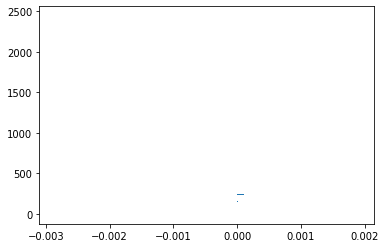

In [23]:
plt.barh(np.arange(len(gas.net_rates_of_progress)),gas.net_rates_of_progress)

In [24]:
gas.T

673.1407052441904

In [25]:
data = pd.read_csv(output_filename)
data

,Distance (mm),T (C),P (atm),Ne,NH3(2),NH2OH(3),HNO3(4),CH3OH(5),H2O(6),N2(7),...,SX(5016),SX(5440),SX(5445),SX(6565),SX(6745),SX(6751),SX(7205),gas_heat,surface_heat,alpha
0,0.000,399.999930,1.0,0.000000e+00,0.030969,0.319680,0.349650,0.209790,0.089910,2.047836e-21,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,123426.913575,0.000000e+00,0.000000e+00
1,0.005,399.999862,1.0,0.000000e+00,0.030969,0.319680,0.349650,0.209790,0.089910,1.067369e-20,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,119111.441414,0.000000e+00,0.000000e+00
2,0.010,399.999791,1.0,0.000000e+00,0.030969,0.319680,0.349650,0.209790,0.089910,3.041636e-20,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,123695.083373,0.000000e+00,0.000000e+00
3,0.015,399.999720,1.0,0.000000e+00,0.030969,0.319680,0.349650,0.209790,0.089911,6.529537e-20,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,125133.705315,0.000000e+00,0.000000e+00
4,0.020,399.999649,1.0,0.000000e+00,0.030969,0.319679,0.349650,0.209790,0.089911,1.187515e-19,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,124613.635123,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.985,399.990847,1.0,1.282595e-36,0.030968,0.319634,0.349621,0.209783,0.089931,6.052561e-14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,62515.017018,0.000000e+00,0.000000e+00
198,0.990,399.990811,1.0,1.282595e-36,0.030968,0.319634,0.349621,0.209783,0.089931,6.203355e-14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,62355.928319,0.000000e+00,0.000000e+00
199,0.995,399.990776,1.0,1.282594e-36,0.030968,0.319633,0.349621,0.209783,0.089931,6.357114e-14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,62196.668690,0.000000e+00,0.000000e+00
200,1.000,399.990741,1.0,1.282594e-36,0.030968,0.319633,0.349620,0.209783,0.089931,6.513882e-14,...,1.420404e-44,6.497816e-33,1.442697e-13,3.114787e-25,5.258355e-14,7.098620e-20,2.516183e-31,62037.236194,-2.182075e-07,-3.517363e-12


In [26]:
def xlabels():
    ticks = []
    labels = []
    mm = 0
    while mm < length*1000:
        ticks.append( int(NReactors * mm * 0.001 / length ) )
        labels.append( str(mm) )
        mm += 1
    labels[-1] = labels[-1] + ' mm'
    plt.xticks(ticks, labels)
    plt.xlabel("Distance down reactor")

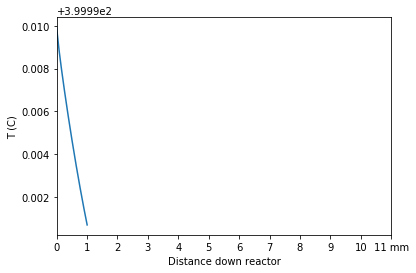

In [27]:
data['T (C)'].plot()
plt.ylabel('T (C)')
xlabels()

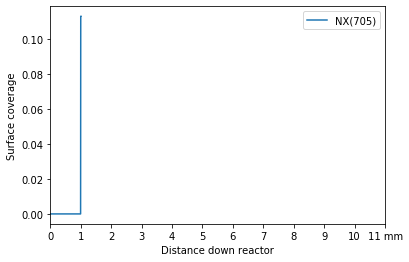

In [28]:
data[['NX(705)']].plot()
plt.ylabel('Surface coverage')
xlabels()

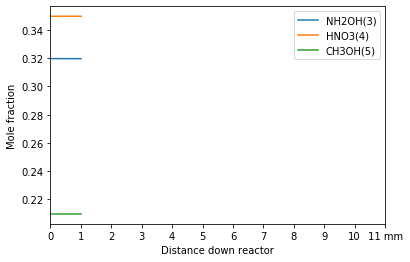

In [29]:
data[['NH2OH(3)', 'HNO3(4)', 'CH3OH(5)']].plot()
plt.ylabel('Mole fraction')
xlabels()

In [30]:
list(data.columns)[:4]

['Distance (mm)', 'T (C)', 'P (atm)', 'Ne']

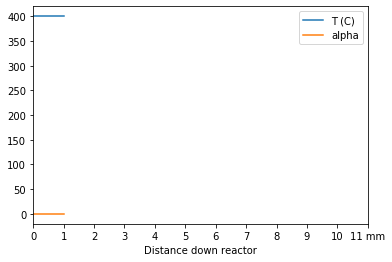

In [31]:
data[['T (C)', 'alpha']].plot()
xlabels()

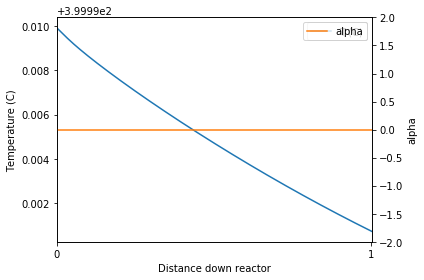

In [32]:
ax1 = data['T (C)'].plot()
plt.ylabel('Temperature (C)')
xlabels()
plt.legend()
ax2 = ax1.twinx()
data['alpha'].plot(ax=ax2, color='tab:orange')
ax2.set_ylim(-2, 2)
plt.legend()
plt.ylabel('alpha')
plt.tight_layout()
plt.savefig('temperature-and-alpha.pdf')
plt.show()

In [33]:
data.columns

Index(['Distance (mm)', 'T (C)', 'P (atm)', 'Ne', 'NH3(2)', 'NH2OH(3)',
       'HNO3(4)', 'CH3OH(5)', 'H2O(6)', 'N2(7)',
       ...
       'SX(5016)', 'SX(5440)', 'SX(5445)', 'SX(6565)', 'SX(6745)', 'SX(6751)',
       'SX(7205)', 'gas_heat', 'surface_heat', 'alpha'],
      dtype='object', length=265)

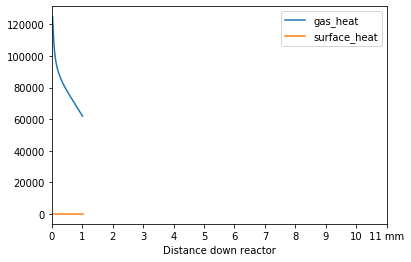

In [34]:
data[['gas_heat','surface_heat']].plot()
#plt.ylim(-1e7, 1e7)
xlabels()
plt.savefig('gas_and_surface_heat.pdf')
plt.show()


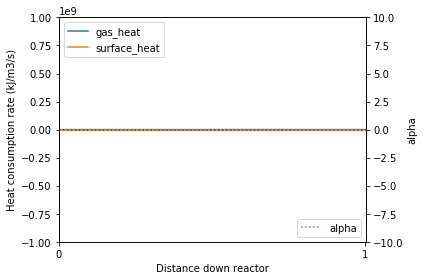

In [35]:
ax1 = data[['gas_heat','surface_heat']].plot()
plt.ylim(-1e9, 1e9)
xlabels()
plt.ylabel('Heat consumption rate (kJ/m3/s)')
plt.legend(loc='upper left')
ax2 = ax1.twinx()
data['alpha'].plot(ax=ax2, style='k:', alpha=0.5)
ax2.set_ylim(-10, 10)
plt.legend(loc='lower right')
plt.ylabel('alpha')
plt.tight_layout()
plt.savefig('heats-and-alpha.pdf')
plt.show()

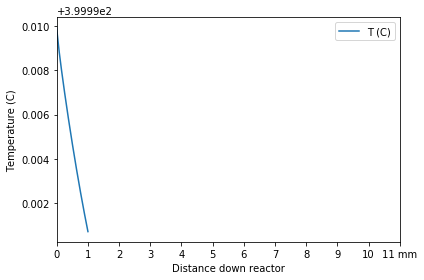

In [36]:
data[['T (C)']].plot()
plt.ylabel('Temperature (C)')
xlabels()
plt.tight_layout()
plt.savefig('temperature.pdf')
plt.show()

/Users/rwest/opt/anaconda3/envs/rmg3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:652: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)


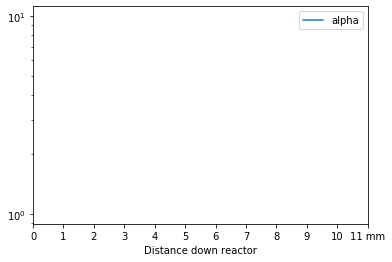

In [37]:
data[['alpha']].plot(logy=True)
xlabels()

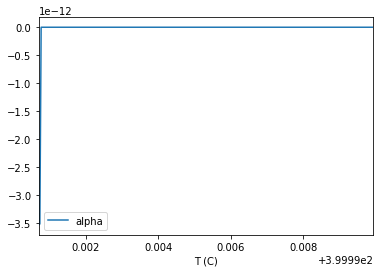

In [38]:
data.plot(x='T (C)',y='alpha')


In [39]:
specs = list(data.columns)
specs = specs[4:-3]
excluded = [s for s in data.columns if s not in specs]
gas_species = [s for s in specs if 'X' not in s ]
adsorbates = [s for s in specs if 'X' in s]

excluded, gas_species, adsorbates

(['Distance (mm)',
  'T (C)',
  'P (atm)',
  'Ne',
  'gas_heat',
  'surface_heat',
  'alpha'],
 ['NH3(2)',
  'NH2OH(3)',
  'HNO3(4)',
  'CH3OH(5)',
  'H2O(6)',
  'N2(7)',
  'O2(8)',
  'NO2(9)',
  'NO(10)',
  'N2O(11)',
  'CO2(12)',
  'H2(13)',
  'CO(14)',
  'CH4(15)',
  'C2H6(16)',
  'CH2O(17)',
  'CH3(18)',
  'C3H8(19)',
  'H(20)',
  'C2H5(21)',
  'HCO(22)',
  'CH3CHO(23)',
  'OH(24)',
  'C2H4(25)',
  'O(36)',
  'Ar(37)',
  'He(38)',
  'HO2(39)',
  'H2O2(40)',
  'HOCO(41)',
  'CH2(42)',
  'CH2(S)(43)',
  'CH(44)',
  'CH2OH(45)',
  'CH3O(46)',
  'HCOH(47)',
  'CH3OO(48)',
  'CH2CO(49)',
  'C2H3(50)',
  'C(51)',
  'C2H2(52)',
  'C2H(53)',
  'CH3OOH(54)',
  'CH2OOH(55)',
  'HOCH2O(56)',
  'HOCHO(57)',
  'C2H5O(58)',
  'C2H5O2(59)',
  'C2H5O2(60)',
  'cC2H4O(61)',
  'CH2CHO(62)',
  'H2CC(63)',
  'CH3CO(64)',
  'C2H4O(65)',
  'C2H5O(66)',
  'C2H3O2(67)',
  'CHCHO(68)',
  'OCHCHO(69)',
  'HCCO(70)',
  'HCCOH(71)',
  'CHCHOH(72)',
  'C2(73)',
  'C2O(74)',
  'C2H6O(75)',
  'C2H5O(76)',
  'C2H

/Users/rwest/opt/anaconda3/envs/rmg3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


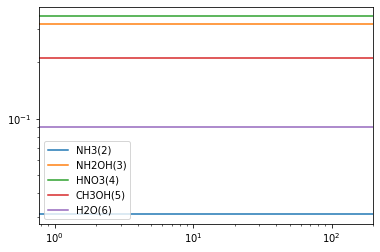

In [40]:
data[gas_species[0:5]].plot(logy=True, logx=True)

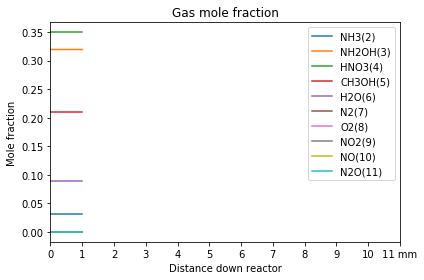

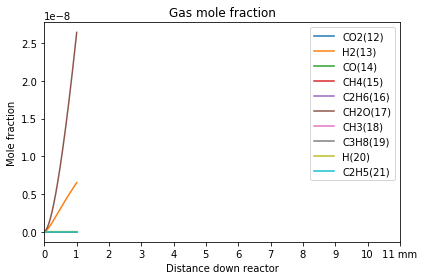

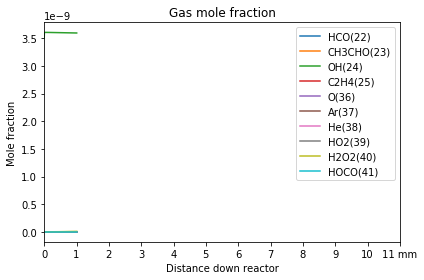

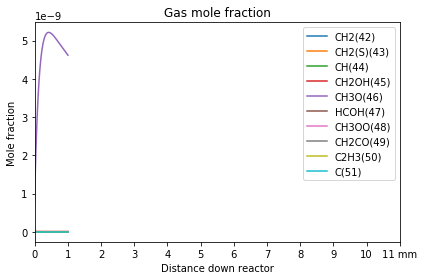

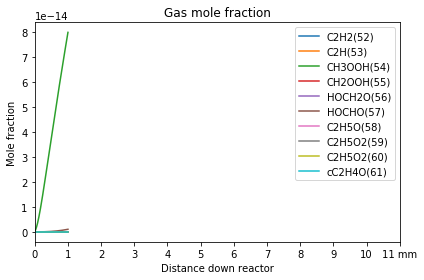

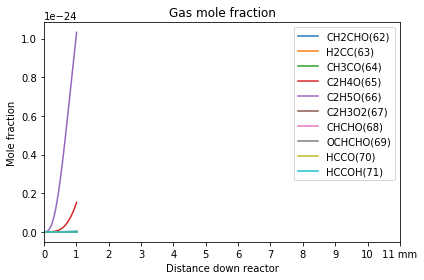

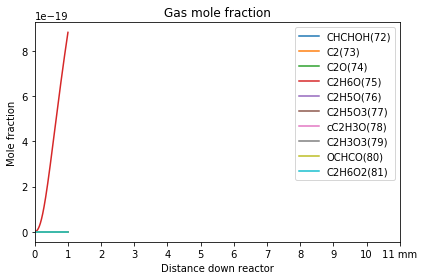

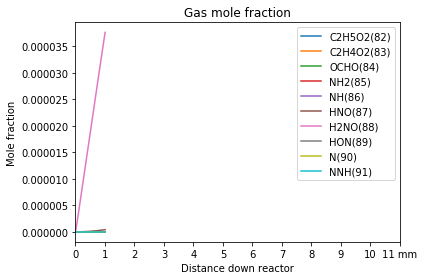

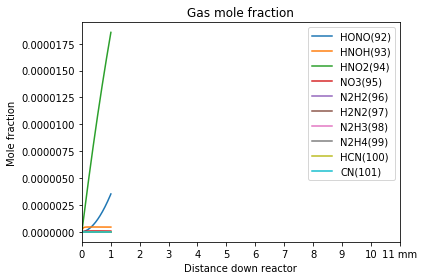

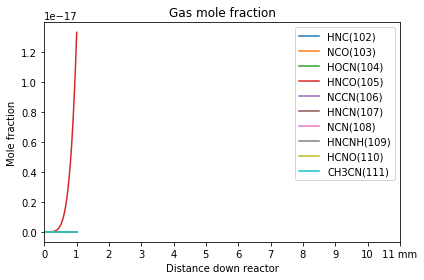

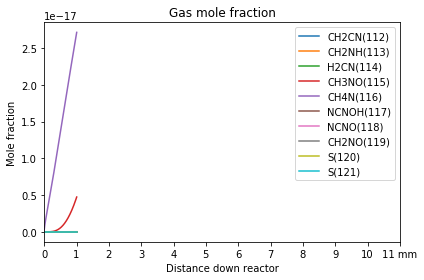

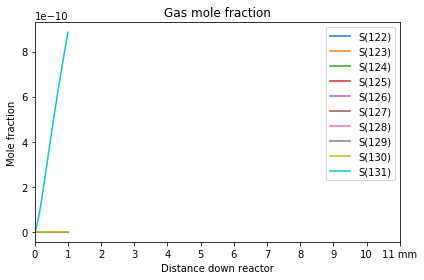

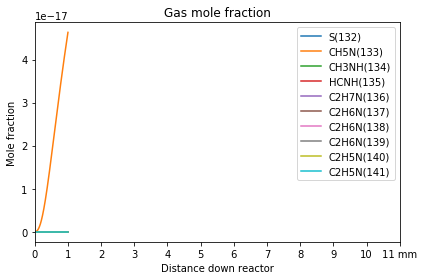

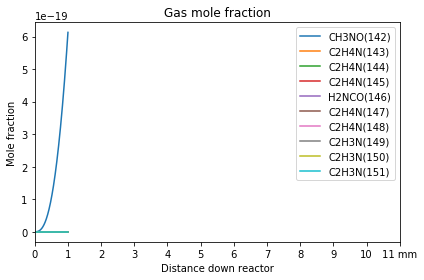

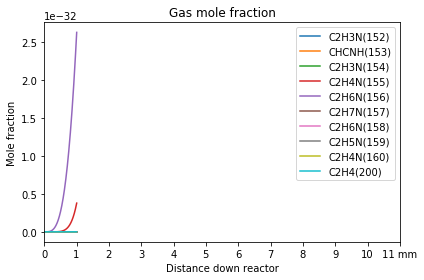

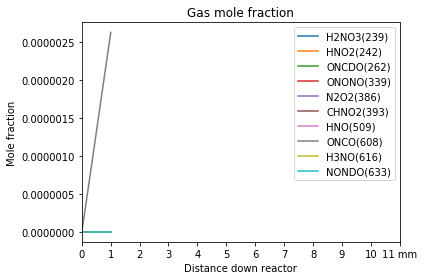

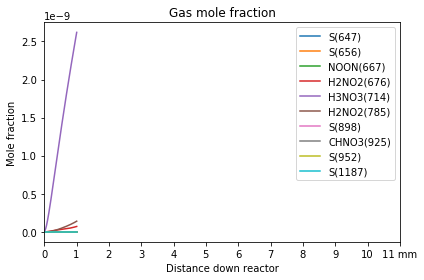

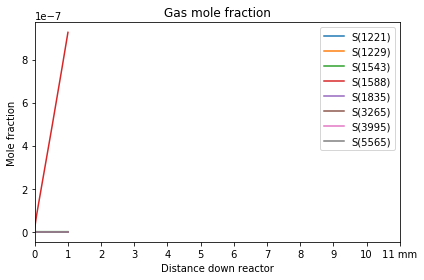

In [41]:
for i in range(0,len(gas_species),10):
    data[gas_species[i:i+10]].plot(title='Gas mole fraction', logy=False)
    xlabels()
    plt.ylabel('Mole fraction')
    plt.tight_layout()
    plt.savefig(f'gas_mole_fractions_{i}.pdf')
    plt.show()
    


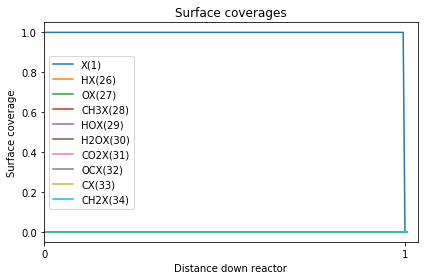

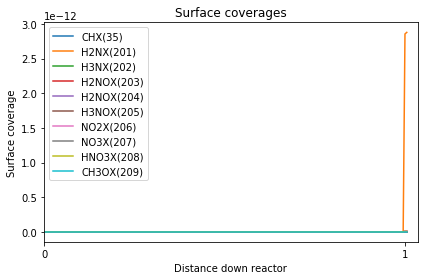

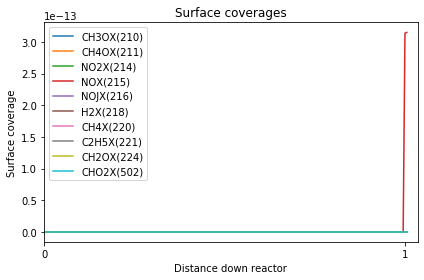

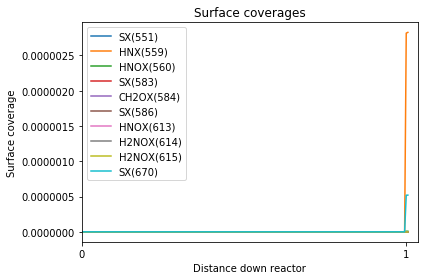

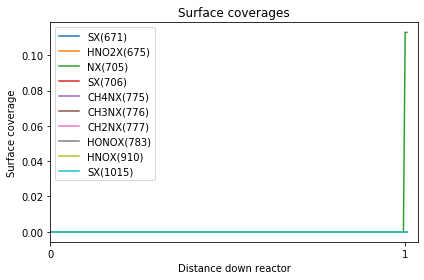

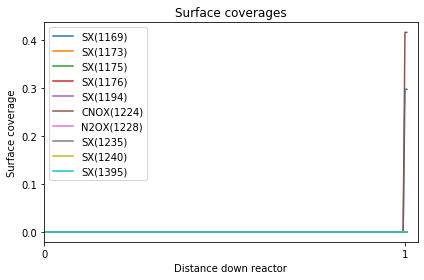

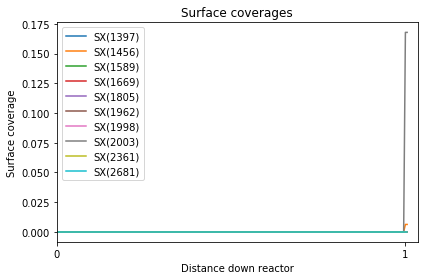

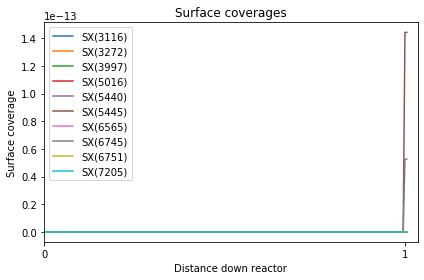

In [42]:
for i in range(0,len(adsorbates),10):
    data[adsorbates[i:i+10]].plot(title='Surface coverages', logy=False)
    xlabels()
    plt.xlim(0,len(data)+5)
    plt.ylabel('Surface coverage')
    plt.tight_layout()
    plt.savefig(f'surface_coverages_{i}.pdf')
    plt.show()

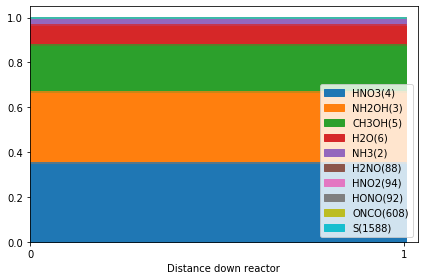

In [43]:
main_gas_species = data[gas_species].max().sort_values(ascending=False)[:10].keys()
data[main_gas_species].plot.area()

xlabels()
plt.xlim(0,len(data)+5)
plt.tight_layout()
plt.savefig(f'gas_mole_fractions_top10.pdf')
plt.show()

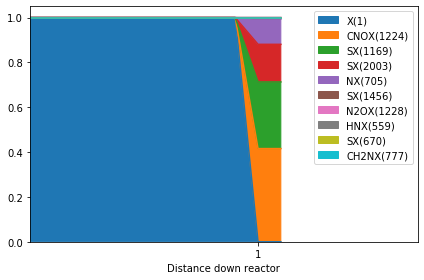

In [47]:
main_adsorbates = data[adsorbates].max().sort_values(ascending=False)[:10].keys()
data[main_adsorbates].plot.area()

xlabels()
plt.xlim(190,len(data)+5)
plt.tight_layout()
plt.savefig(f'surface_coverages_top10.pdf')
plt.show()
    

In [45]:
for a in main_adsorbates:
    s = surf.species(a)
    print(s, s.composition)

<Species X(1)> {'X': 1.0}
<Species CNOX(1224)> {'C': 1.0, 'N': 1.0, 'O': 1.0, 'X': 1.0}
<Species SX(1169)> {'C': 1.0, 'H': 2.0, 'N': 1.0, 'O': 2.0, 'X': 1.0}
<Species SX(2003)> {'H': 1.0, 'N': 3.0, 'O': 3.0, 'X': 1.0}
<Species NX(705)> {'N': 1.0, 'X': 1.0}
<Species SX(1456)> {'C': 1.0, 'H': 3.0, 'N': 2.0, 'O': 3.0, 'X': 1.0}
<Species N2OX(1228)> {'N': 2.0, 'O': 1.0, 'X': 1.0}
<Species HNX(559)> {'H': 1.0, 'N': 1.0, 'X': 1.0}
<Species SX(670)> {'C': 1.0, 'H': 2.0, 'N': 1.0, 'O': 1.0, 'X': 1.0}
<Species CH2NX(777)> {'C': 1.0, 'H': 2.0, 'N': 1.0, 'X': 1.0}


In [46]:
data.loc[0]

Distance (mm)         0.000000
T (C)               399.999930
P (atm)               1.000000
Ne                    0.000000
NH3(2)                0.030969
                     ...      
SX(6751)              0.000000
SX(7205)              0.000000
gas_heat         123426.913575
surface_heat          0.000000
alpha                 0.000000
Name: 0, Length: 265, dtype: float64